In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [4]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=490a643bf7ec6114d91e47cb7c01a1ce1323eea9239c09fa33e3393303f21bbc
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [5]:
!pip install seaborn[stats]

In [6]:
from PIL import Image

import re
import string
import unidecode

from autocorrect import Speller

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize, sent_tokenize

import spacy

nlp = spacy.load('en_core_web_sm')
from spacy.lang.en import English
en_nlp = English()

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Milestone 1

# Step 1: Import the data

In [7]:
def readData():
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneNLPDataset.csv")
  return data

In [8]:
data = readData()

# Step 2: Data Cleansing

## EDA (Exploratory Data Analysys)

In [9]:
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


**Observation:**

1. The Column Unnamed: 0 adds no value to the dataset and it can be removed
2. Replace column name "Data"  to "Date"
3. Extend date column to "Month" and "Year". This will allow us to analysis month and year wise
4.. Replce ColumnName "Genre" to "Gender

In [10]:
data.shape

(425, 11)

**Observation:**
1. The dataset contains 425 rows.
2. The dataset contains 11 columns.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


**Observations**

1. There are no null values. Imputation is not needed.
2. Datatype of all the column is object.
3. Convert the value to either numerical or categorical based on values.

In [12]:
data.isnull().values.any()

False

**Observation:**
There is no null values in the dataset

In [13]:
data.duplicated().sum()

0

Observations:

1. There are no duplicate records in existing dataset.
2. As per analysis, remove Column "Unnamed: 0" and verify any duplicate exist.

In [14]:
data = data.drop(["Unnamed: 0"], axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [16]:
data.shape

(425, 10)

**Observation:**
1. The number of columns dropped from 11 to 10.
2. The dataset contains 425 rows.
3. The dataset contains 10 columns.

In [17]:
data.duplicated().sum()

7

Observation:
1. 7 records found as duplicate.

In [18]:
data = data.drop_duplicates()

In [19]:
data = data.reset_index(drop=True)

In [20]:
data.shape

(418, 10)

**Observation:**
1. The rows were dropped from 425 to 418 after deleting 7 duplicate records.

In [21]:
data.rename(columns={'Data':'Date','Genre':'Gender'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Countries                 418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee or Third Party   418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 32.8+ KB


In [22]:
data.rename(columns={'Industry Sector':'IndustrySector','Accident Level':'AccidentLevel','Potential Accident Level':'PotentialAccidentLevel','Employee or Third Party':'EmployeeorThirdParty','Critical Risk':'CriticalRisk'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    418 non-null    object
 1   Countries               418 non-null    object
 2   Local                   418 non-null    object
 3   IndustrySector          418 non-null    object
 4   AccidentLevel           418 non-null    object
 5   PotentialAccidentLevel  418 non-null    object
 6   Gender                  418 non-null    object
 7   EmployeeorThirdParty    418 non-null    object
 8   CriticalRisk            418 non-null    object
 9   Description             418 non-null    object
dtypes: object(10)
memory usage: 32.8+ KB


In [23]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    418 non-null    datetime64[ns]
 1   Countries               418 non-null    object        
 2   Local                   418 non-null    object        
 3   IndustrySector          418 non-null    object        
 4   AccidentLevel           418 non-null    object        
 5   PotentialAccidentLevel  418 non-null    object        
 6   Gender                  418 non-null    object        
 7   EmployeeorThirdParty    418 non-null    object        
 8   CriticalRisk            418 non-null    object        
 9   Description             418 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 32.8+ KB


**Observations:**

a.	Column names have space in it.

b.	Renaming the column would help to access the column directly from the dataframe such as data.AccicentLevel.



In [26]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['YearMonth'] = data['Date'].dt.strftime('%Y-%b')

In [27]:
data.head(5)

,Date,Countries,Local,IndustrySector,AccidentLevel,PotentialAccidentLevel,Gender,EmployeeorThirdParty,CriticalRisk,Description,Year,Month,Day,YearMonth
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,2016-Jan
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,2016-Jan
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,2016-Jan
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,2016-Jan
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,2016-Jan


In [28]:
labelencoder = LabelEncoder()
data['AccidentLevelID'] = labelencoder.fit_transform(data.AccidentLevel)
data['CountriesID'] = labelencoder.fit_transform(data.Countries)
data['LocalID'] = labelencoder.fit_transform(data.Local)
data['IndustrySectorID'] = labelencoder.fit_transform(data.IndustrySector)
data['PotentialAccidentLevelID'] = labelencoder.fit_transform(data.PotentialAccidentLevel)
data['GenderID'] = labelencoder.fit_transform(data.Gender)
data['EmployeeorThirdPartyID'] = labelencoder.fit_transform(data.EmployeeorThirdParty)
data['CriticalRiskID'] = labelencoder.fit_transform(data.CriticalRisk)


## Univariate Analysis

<ipython-input-29-e54332a4d773>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AccidentLevelID'])


<Axes: xlabel='AccidentLevelID', ylabel='Density'>

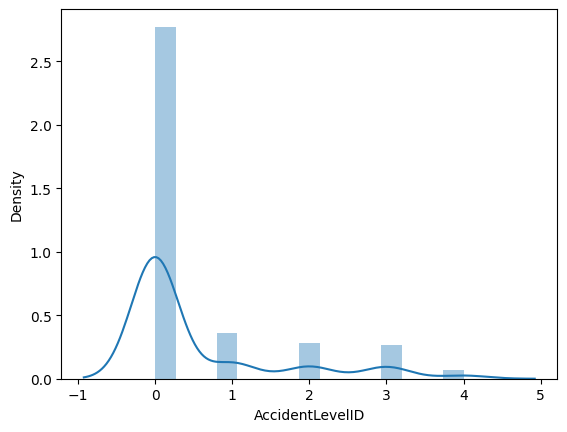

In [29]:
sns.distplot(data['AccidentLevelID'])

**Observations:**

a.	The depth of the accidents is high in Level1.

b.	The rest of the accident from Level 2 to Leve 4 are consistently low.


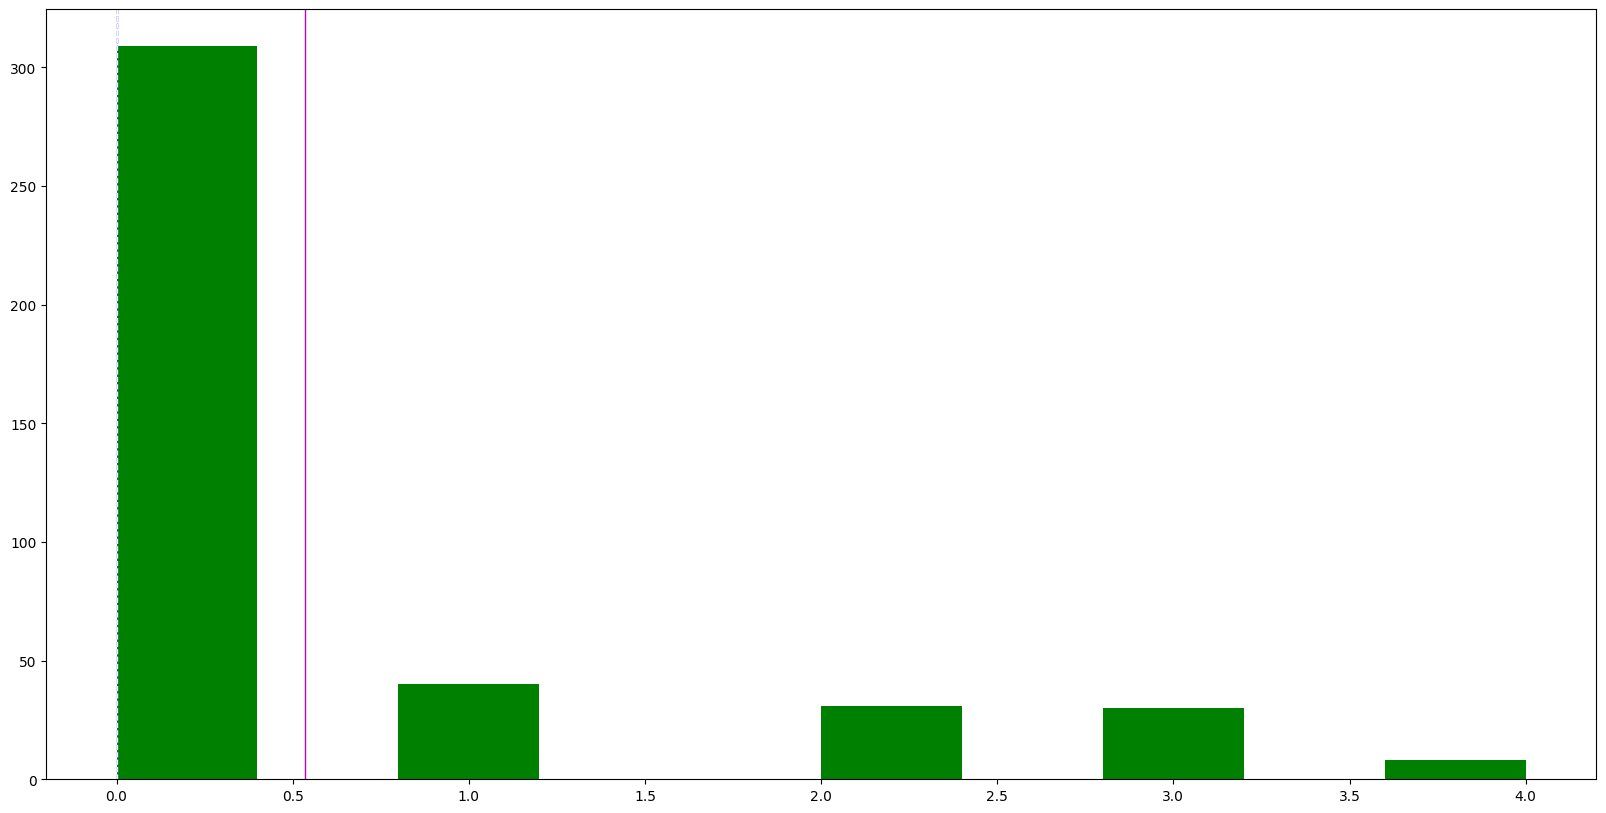

In [30]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data['AccidentLevelID'], color='g') # plots a simple histogram
plt.axvline(data['AccidentLevelID'].mean(), color='m', linewidth=1)
plt.axvline(data['AccidentLevelID'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data['AccidentLevelID'].mode()[0], color='w', linestyle='dashed', linewidth=1)

**Observations:**

a.	The mean and median are far away from each other.


<ipython-input-31-771734386279>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AccidentLevelID'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))


<Axes: xlabel='AccidentLevelID', ylabel='Density'>

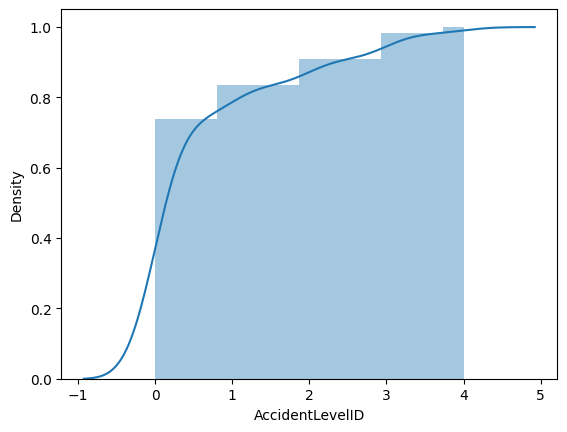

In [31]:
sns.distplot(data['AccidentLevelID'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

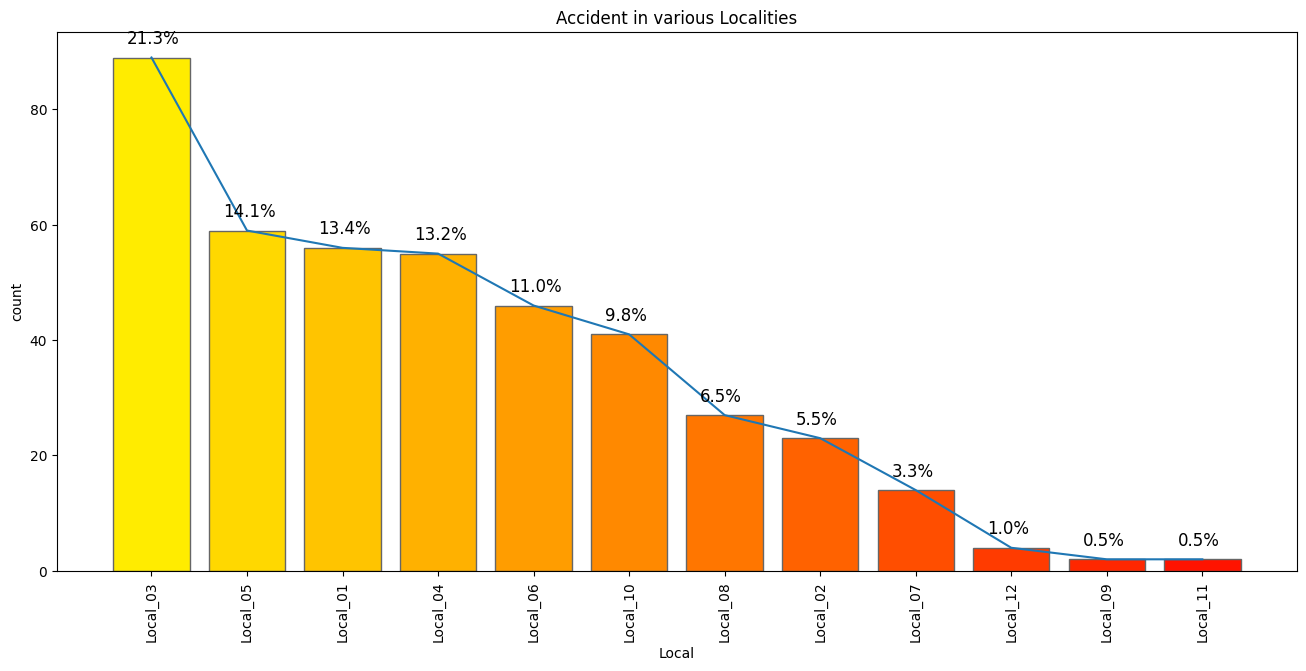

In [41]:
plt.figure(figsize = (16,7))
ax = sns.countplot(x = data['Local'], order=data['Local'].value_counts().index, palette = 'autumn_r', edgecolor='.4', saturation=1);
sns.lineplot( data['Local'].value_counts().values)

plt.title('Accident in various Localities');
plt.xticks(rotation = 'vertical');

total = sum(data['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (10, 10),
                 textcoords = 'offset points')

**Observations:**

1. Local 3 have higher incident of 21.3%
2. Local 11 have lower incident of 0.5%

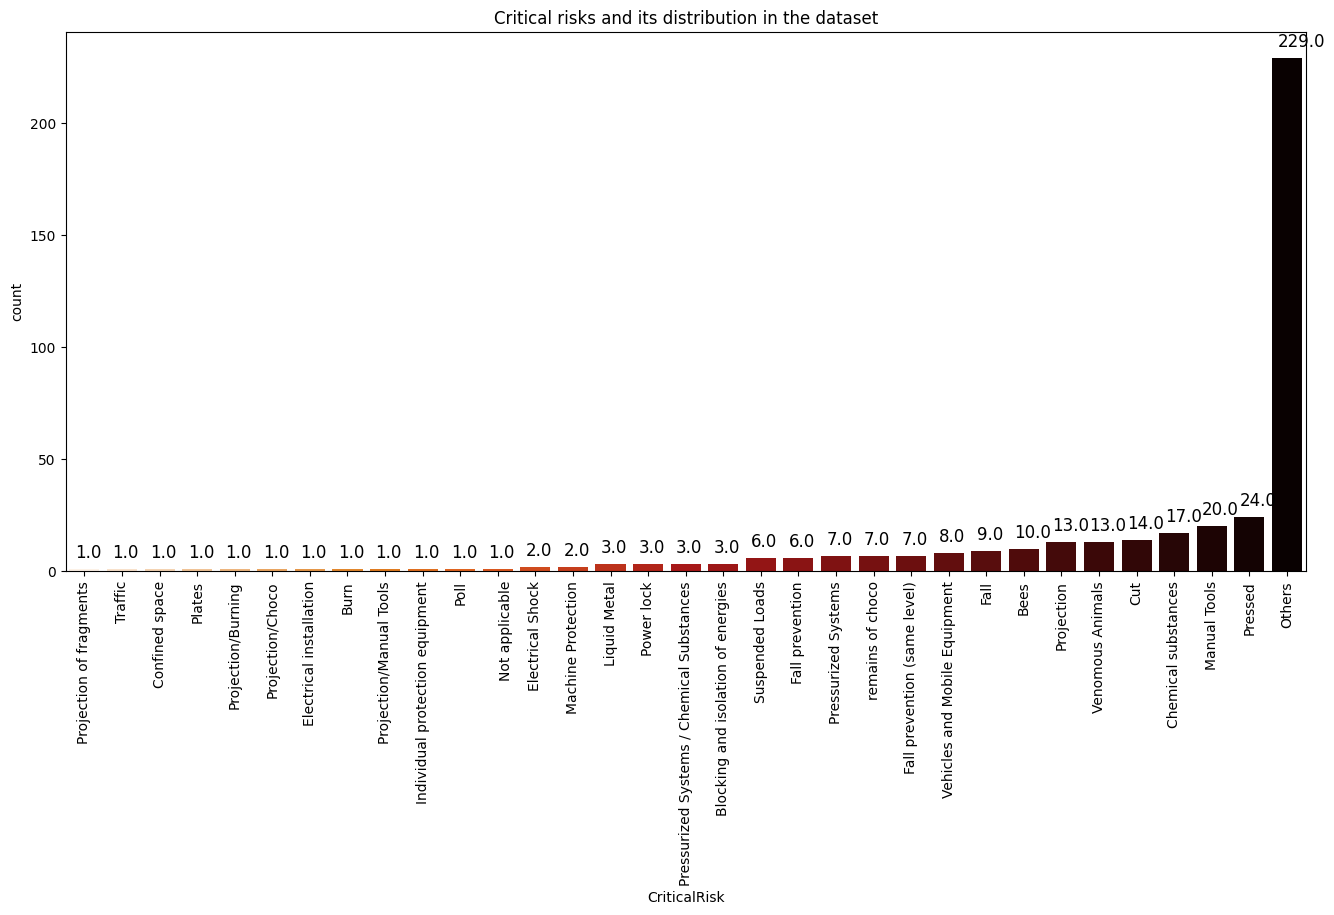

In [64]:
plt.figure(figsize = (16,7))
ax = sns.countplot(x = data['CriticalRisk'], order=data['CriticalRisk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('Critical risks and its distribution in the dataset');
plt.xticks(rotation = 'vertical');

total = sum(data['CriticalRisk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8),
                 textcoords = 'offset points')

**Observations:**

1. Crictical risks are highly distributed in others category which count is 229.
2. The remaining crictical risks count is between 1 and 24

##BiVariate Analysis

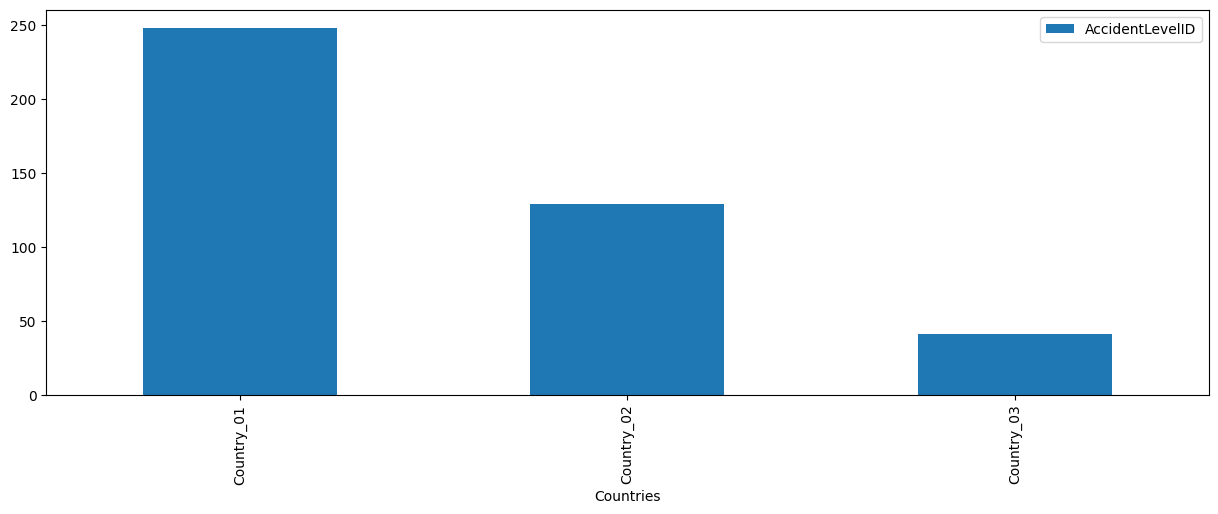

In [32]:
data.groupby(by=['Countries'])['AccidentLevelID'].count().reset_index().sort_values(['Countries']).tail(10).plot(x='Countries',
                                                                                                           y='AccidentLevelID',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

**Observations:**

a.	Country 1 had accident around 250.

b.	Accident in Country 2 was around 125.

c.	Accident in Country 3 was around 50.


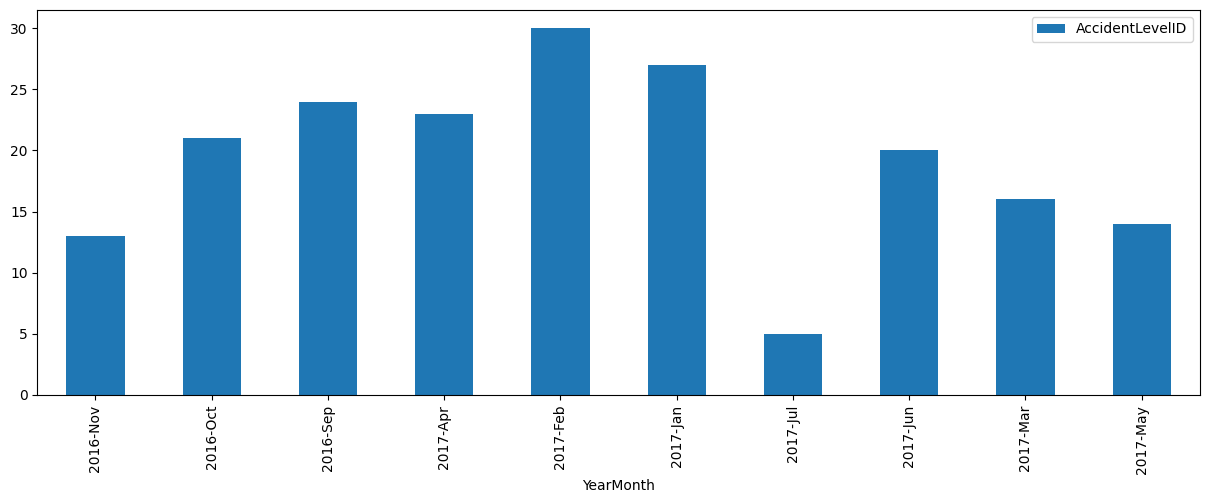

In [33]:

data.groupby(by=['YearMonth'])['AccidentLevelID'].count().reset_index().sort_values(['YearMonth']).tail(10).plot(x='YearMonth',
                                                                                                           y='AccidentLevelID',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

**Observations:**

a.	Most accident occurred in February 2017.

b.	Less accident occurred in July 2017


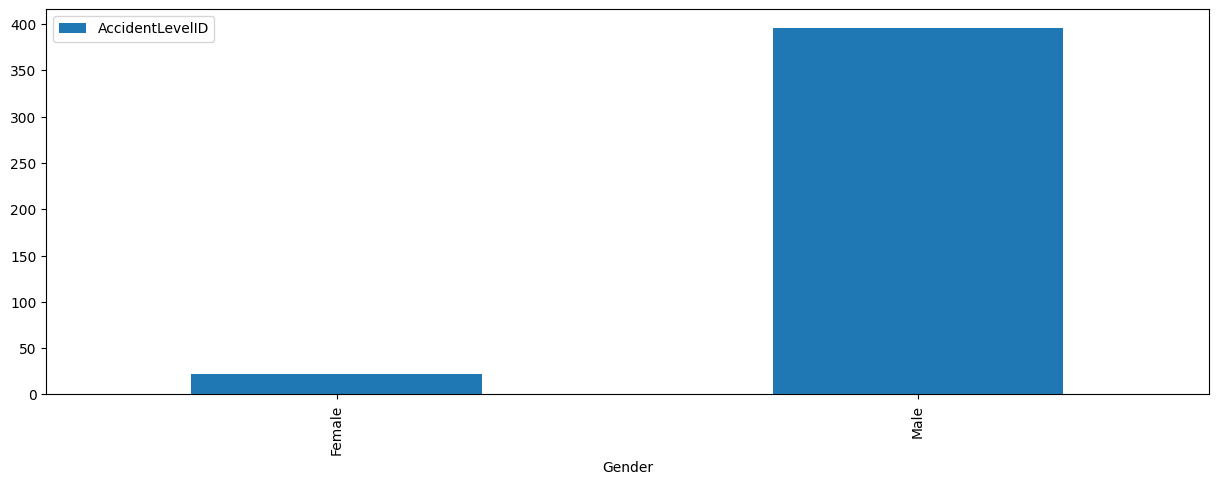

In [34]:
data.groupby(by=['Gender'])['AccidentLevelID'].count().reset_index().sort_values(['Gender']).tail(10).plot(x='Gender',
                                                                                                           y='AccidentLevelID',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

**Observations:**

a.	Number of accidents for Male was around 350.

b.	Number of accidents for Female was around 25.

c.	The statistics shows that the probability is higher for Male to get into accident.


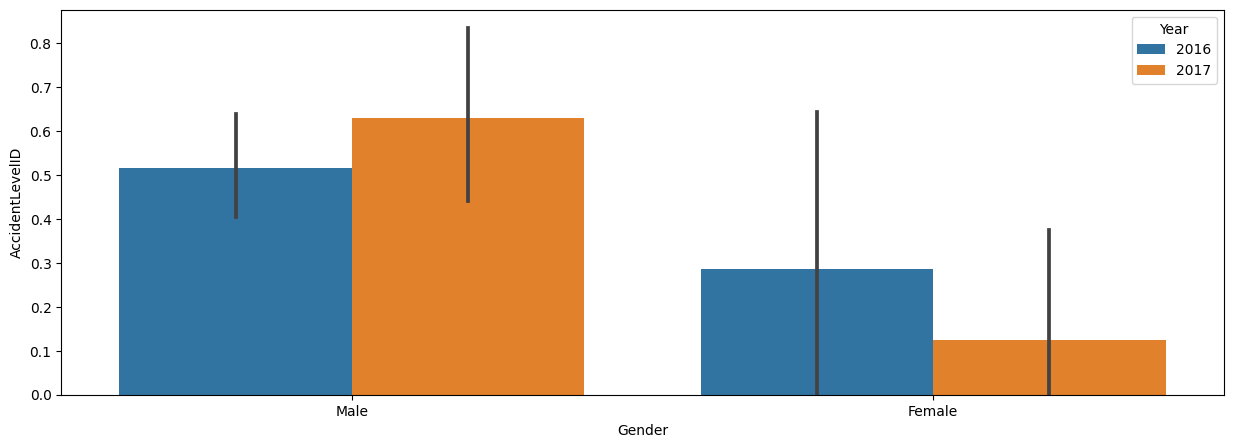

In [35]:

plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Gender',y='AccidentLevelID',hue='Year')
plt.show()

**Observations:**

a.	The number of accidents were higher in 2017 for Male.

b.	The number of accidents were higher in 2016 for Female.


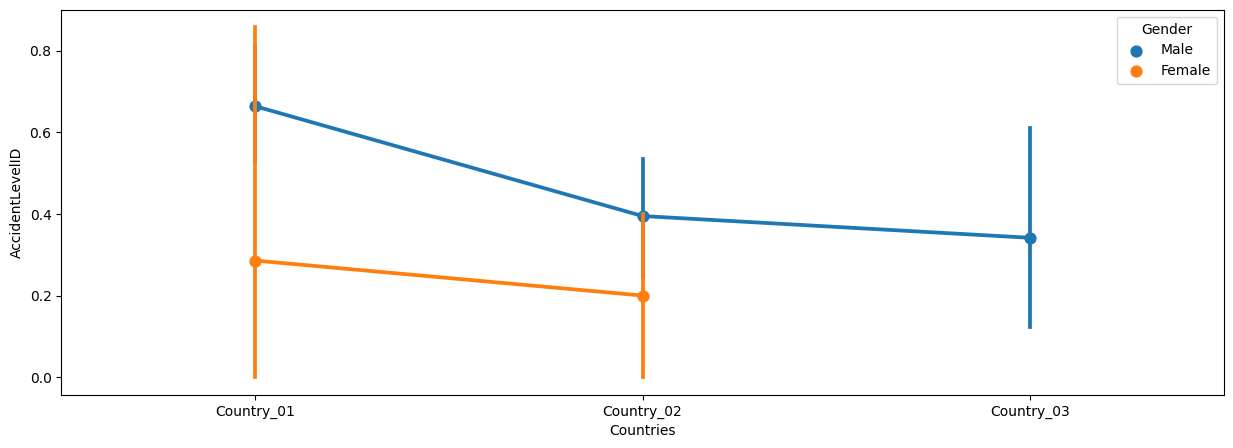

In [36]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Countries", y="AccidentLevelID", hue = 'Gender',  data=data)
plt.show()


**Observations:**

a. Accident for female happened only in Country 1 and 2, number of accident occurences are low compared to male.

b. Accident for Male happened on 3 countries, number of accident were high compared to female.

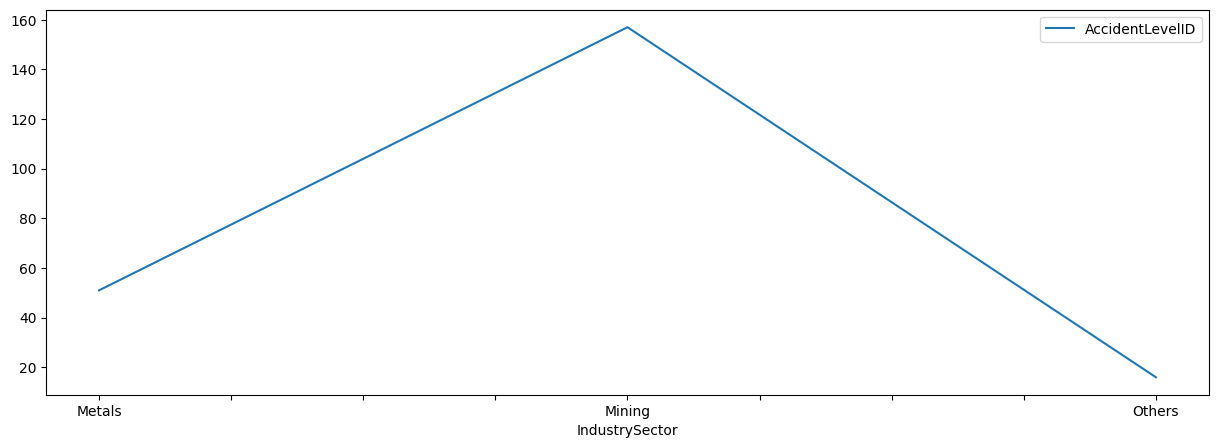

In [ ]:
data[['IndustrySector','AccidentLevelID']].groupby(['IndustrySector']).sum().plot(figsize=(15,5))

plt.show()

**Observations:**

a.	Mining sector had more accidents which was around 150.

b.	Metal sector had around 50 accidents

c.	Others had around 20 accidents.


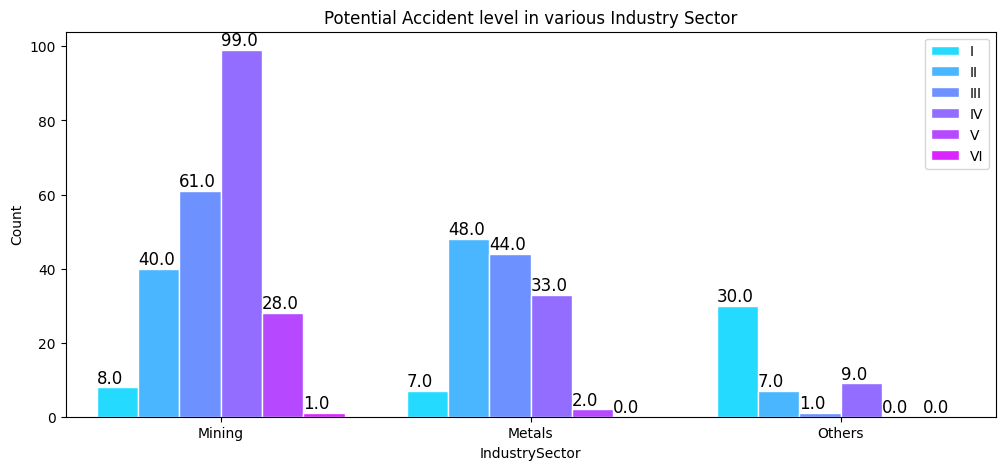

In [51]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['IndustrySector'],x=data['IndustrySector'], hue=data['PotentialAccidentLevel'], hue_order=data['PotentialAccidentLevel'].value_counts().sort_index().index, palette='cool', edgecolor='1.0', saturation=1)

total = sum(data['IndustrySector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level in various Industry Sector');
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations:**

1. Mining sector had more accidents.
2. level IV had high accidents and level III takes next higher accidents
3. Level VI had very low accidents in all the sectors.

In [60]:
#Plotting graph to represent accident levels and potential accident levels

accidentlevels = data['AccidentLevel'].value_counts()
potentialaccidentlevels = data['PotentialAccidentLevel'].value_counts()

#Concatenate both in to one dataframe
accident_potential = pd.concat([accidentlevels,potentialaccidentlevels],axis=1, sort=False).fillna(0).reset_index()

accident_potential = pd.melt(accident_potential, ['index'], var_name='AccidentType', value_name='Count')
accident_potential

,index,AccidentType,Count
0,I,AccidentLevel,309.0
1,II,AccidentLevel,40.0
2,III,AccidentLevel,31.0
3,IV,AccidentLevel,30.0
4,V,AccidentLevel,8.0
5,VI,AccidentLevel,0.0
6,I,PotentialAccidentLevel,45.0
7,II,PotentialAccidentLevel,95.0
8,III,PotentialAccidentLevel,106.0
9,IV,PotentialAccidentLevel,141.0


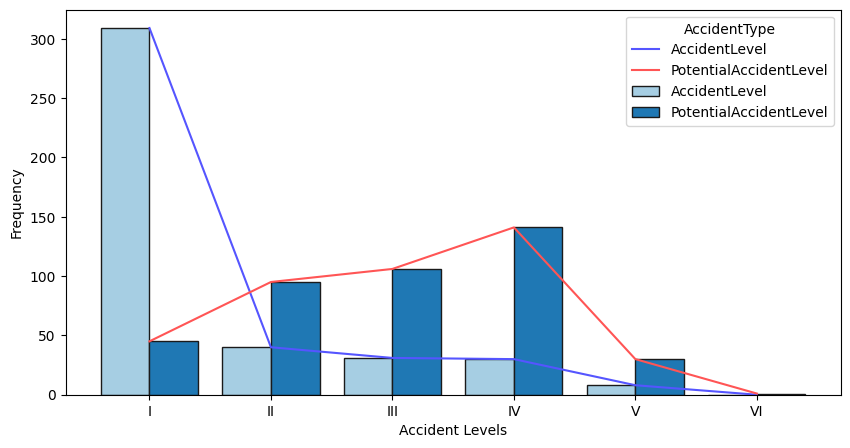

In [63]:


plt.figure(figsize=(10,5))
sns.barplot(x=accident_potential['index'],y= accident_potential['Count'], hue=accident_potential['AccidentType'], palette='Paired', edgecolor='.1', saturation=1)
sns.lineplot(x=accident_potential['index'], y=accident_potential['Count'], hue=accident_potential['AccidentType'], palette='seismic')

plt.xlabel('Accident Levels');
plt.ylabel('Frequency');

**Observations:**

1. Potential to occur accidents in Level I is much lower.
2. Significantly high pottential to occur accidents in Level II to Level V

## Multivariate Analysis

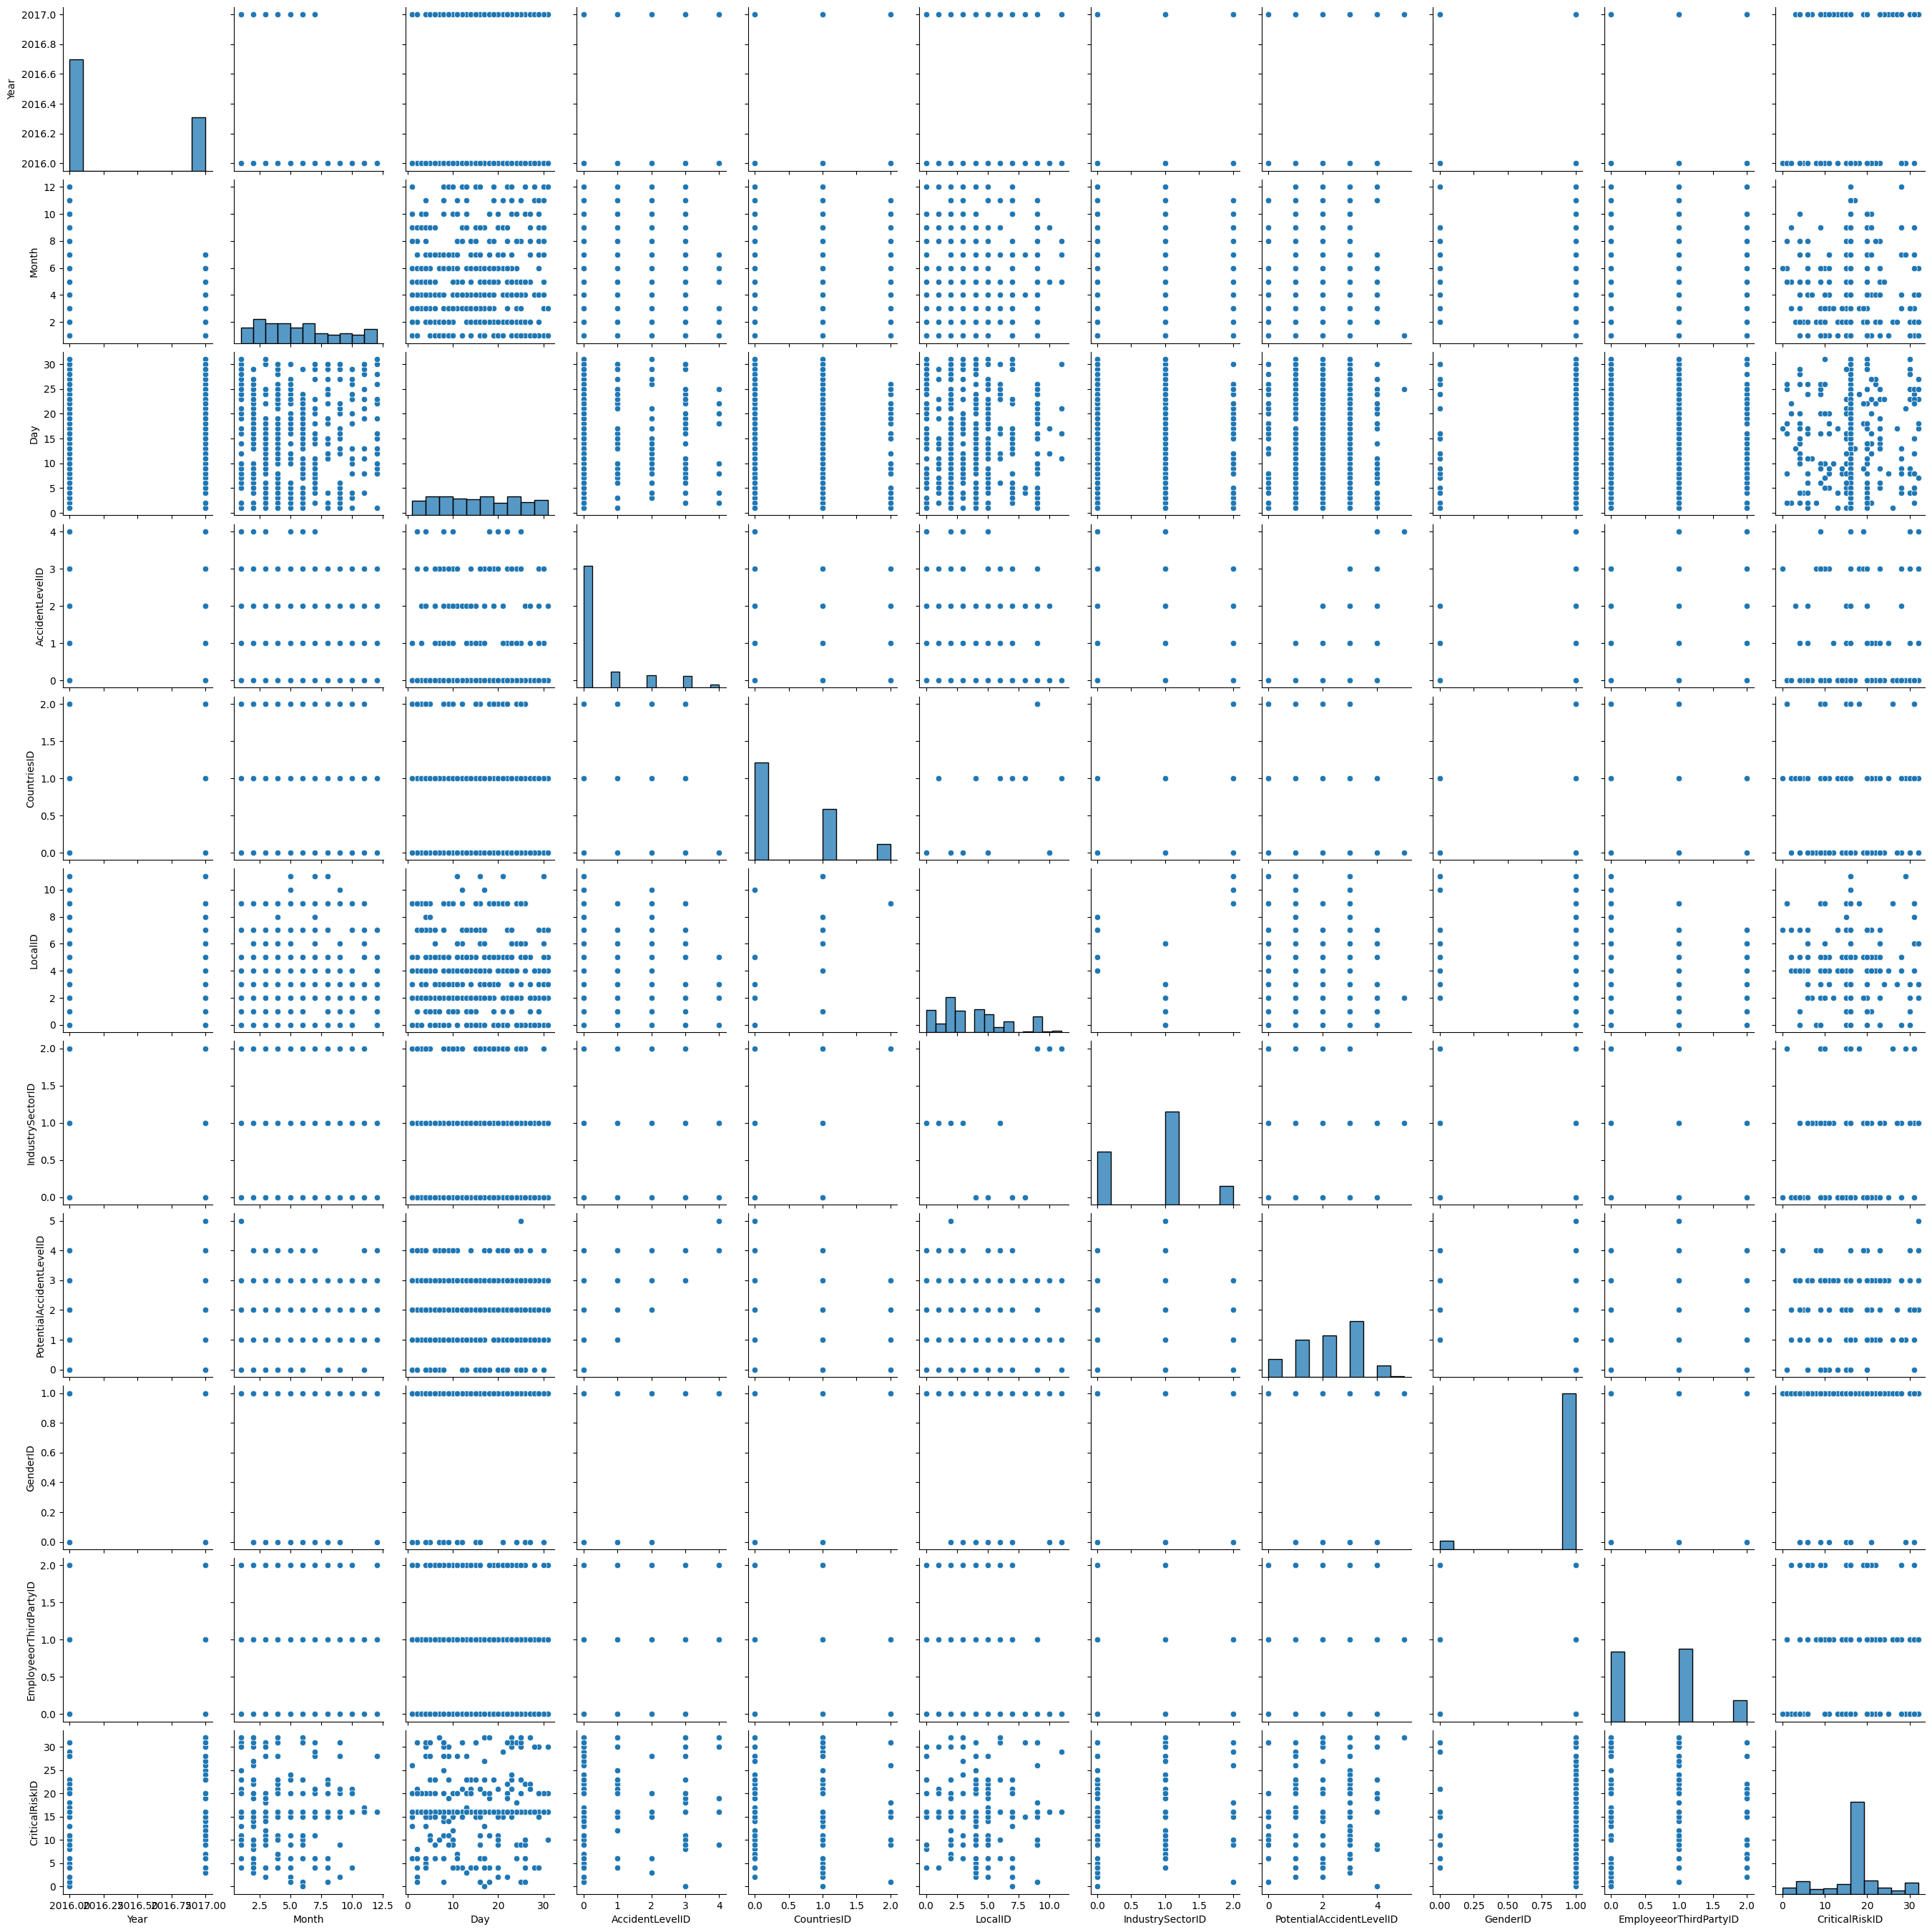

In [ ]:
sns.pairplot(data)

**Observations:**

a.	The diagram represents the degree for correlation between two variables.


<ipython-input-335-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

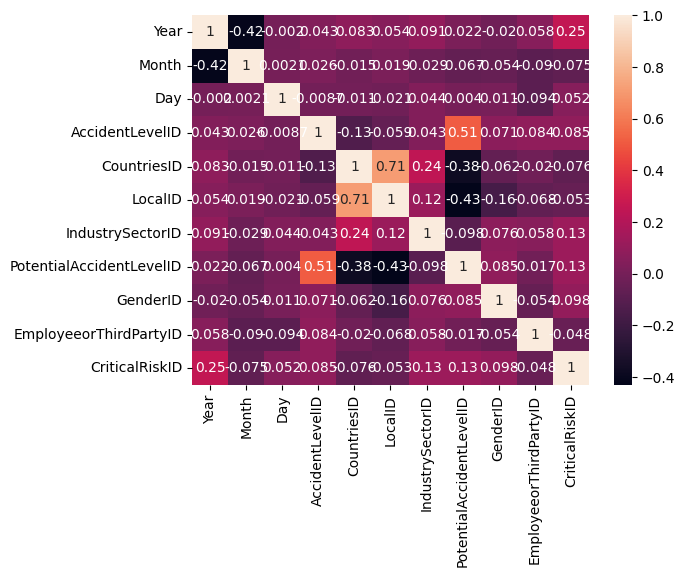

In [ ]:
sns.heatmap(data.corr(),annot=True)

**Observations:**

a.	Heatmap shows correlation levels between 0 and 1 for two variables.

b.	Correlation is always high for same variables.

c.	Dark shades represent low correlation.

d.	Ligh shades represent high correlation.


In [ ]:
dsc = data.at[4,'Description']
print(dsc)

Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Local                     418 non-null    object        
 3   IndustrySector            418 non-null    object        
 4   AccidentLevel             418 non-null    object        
 5   PotentialAccidentLevel    418 non-null    object        
 6   Gender                    418 non-null    object        
 7   EmployeeorThirdParty      418 non-null    object        
 8   CriticalRisk              418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  Month                     418 non-null    int64         
 12  Day                   

In [ ]:
#data = data.drop(['Unnamed: 0','Data','Countries','Local','Industry Sector','Potential Accident Level','Genre','Employee or Third Party','Employee or Third Party','Critical Risk'],axis=1)

## Step 3: Data preprocessing

In [ ]:
data[data['Description'].str.contains(r'É|é|Á|á|ó|Ó|ú|Ú|í|Í')].head(5)

,Date,Countries,Local,IndustrySector,AccidentLevel,PotentialAccidentLevel,Gender,EmployeeorThirdParty,CriticalRisk,Description,...,YearMonth,AccidentLevelID,CountriesID,LocalID,IndustrySectorID,PotentialAccidentLevelID,GenderID,EmployeeorThirdPartyID,CriticalRiskID,cleansed_text
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,...,2016-Jan,0,0,3,1,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,...,2016-Jan,3,0,3,1,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...
7,2016-01-17,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic...",...,2016-Jan,0,0,3,1,2,1,1,20,"At approximately 04:50 p.m., when the mechanic..."
12,2016-02-01,Country_02,Local_05,Metals,I,I,Male,Employee,Liquid Metal,The collaborator reports that he was working i...,...,2016-Feb,0,1,4,0,0,1,0,13,The collaborator reports that he was working i...
19,2016-02-21,Country_01,Local_06,Metals,I,III,Male,Employee,Others,The worker Manuel was making the disconnection...,...,2016-Feb,0,0,5,0,2,1,0,16,The worker Manuel was making the disconnection...


Sample extracted to verify whether any accented characters are in the text
1. In Row 3 - Mr. Cristobal has accented character
2. In Row 4 - Eric Fernández has accented characters


### Removing accented Characters

In [ ]:
data.shape[0]

418

In [ ]:
data.columns

Index(['Date', 'Countries', 'Local', 'IndustrySector', 'AccidentLevel',
       'PotentialAccidentLevel', 'Gender', 'EmployeeorThirdParty',
       'CriticalRisk', 'Description', 'Year', 'Month', 'Day', 'YearMonth',
       'AccidentLevelID', 'CountriesID', 'LocalID', 'IndustrySectorID',
       'PotentialAccidentLevelID', 'GenderID', 'EmployeeorThirdPartyID',
       'CriticalRiskID'],
      dtype='object')

In [ ]:
## Created a function to accept data, remove accendted data and return the results
def removeAccentedChars(data, columnName):
  text =[]

  for i in range(data.shape[0]):

    t=data[columnName][i].split()
    new_text = [unidecode.unidecode(word) for word in t]
    new_text = ' '.join(new_text)
    text.append(new_text)

  return text


In [ ]:
data['cleansed_text'] = removeAccentedChars(data,'Description')

In [ ]:
data.loc[[1,3,4],['Description','cleansed_text']]

,Description,cleansed_text
1,During the activation of a sodium sulphide pum...,During the activation of a sodium sulphide pum...
3,Being 9:45 am. approximately in the Nv. 1880 C...,Being 9:45 am. approximately in the Nv. 1880 C...
4,Approximately at 11:45 a.m. in circumstances t...,Approximately at 11:45 a.m. in circumstances t...


Sample extracted to verify whether any accented characters are in the text
1. In Row 3 - Accented character was removed
2. In Row 4 - Eric Fernández has accented characters and it was removed



### Removing special characters from the text

In [ ]:
#Created a function to accept dataset, column name and perform action to remove word with special characters

def removeSpecialChars(data,columnName):
  text = []

  for i in range(data.shape[0]):
    words = data[columnName][i].split()
    new_text = [element for element in words if element.isalnum()]
    new_text = " ".join(new_text)
    text.append(new_text)

  return text


In [ ]:

data['cleansed_text'] = removeSpecialChars(data,'cleansed_text')


In [ ]:
data.loc[[1,3,4],['Description','cleansed_text']]

,Description,cleansed_text
1,During the activation of a sodium sulphide pum...,During the activation of a sodium sulphide the...
3,Being 9:45 am. approximately in the Nv. 1880 C...,Being approximately in the 1880 the personnel ...
4,Approximately at 11:45 a.m. in circumstances t...,Approximately at in circumstances that the mec...


Sample extracted to verify whether any special characters are in the text
1. In Row 3 - Comma, hypen, colon, dot were removed
2. In Row 4 - Comma, dot, slash, time were removed


**isalnum()** has removed all the special charecters

### Change the text to lower case

In [ ]:
#Created a funcation to apply lower case to the texts in the dataset

def lowerCase(data, columnName):
  text =[]

  for i in range(data.shape[0]):
    new_text = data[columnName][i].lower()
    text.append(new_text)

  return text



In [ ]:
data['cleansed_text'] = lowerCase(data,'cleansed_text')

In [ ]:
data.loc[[1,10],['Description','cleansed_text']]

,Description,cleansed_text
1,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide the...
10,While installing a segment of the polyurethane...,while installing a segment of the polyurethane...


### Stripping Extra Spaces

In [ ]:
def stripExtraSpaces(data, columnName):
  text =[]

  for i in range(data.shape[0]):
    new_text = data[columnName][i].strip()
    text.append(new_text)

  return text


In [ ]:
data['cleansed_text'] = stripExtraSpaces(data,'cleansed_text')

In [ ]:
data.loc[[1,10],['Description','cleansed_text']]

,Description,cleansed_text
1,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide the...
10,While installing a segment of the polyurethane...,while installing a segment of the polyurethane...


### SpellChecking

In [ ]:
spell = Speller(lang='en')

def autoSpell(data, columnName):
  text = []
  for i in range(data.shape[0]):
    words = data[columnName][i].split()
    new_text = [spell(word) for word in words]
    new_text = " ".join(new_text)
    text.append(new_text)

  return text

In [ ]:
data['cleansed_text'] = autoSpell(data,'cleansed_text')

In [ ]:
data.loc[[1,10],['Description','cleansed_text']]

,Description,cleansed_text
1,During the activation of a sodium sulphide pum...,during the activation of a sodium sulfide the ...
10,While installing a segment of the polyurethane...,while installing a segment of the polyurethane...


### WordCloud for top 100 words

In [ ]:
def wordCloud(data,columnName):
  all_texts = " ".join(texts for texts in data[columnName])

  print("There are {} words in the combination of all the texts".format(len(all_texts)))

  wordcloud = WordCloud(max_font_size=40,max_words=100,background_color="white").generate(all_texts)
  plt.figure(figsize=(8,12))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

There are 153160 words in the combination of all the texts


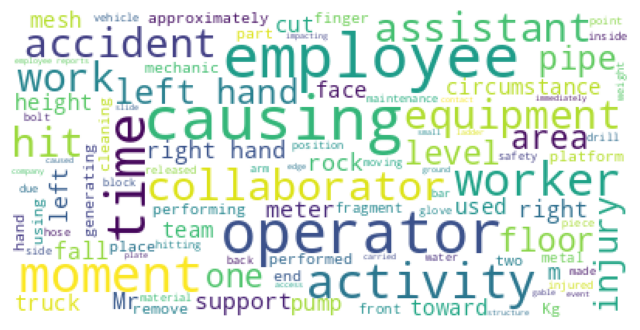

In [ ]:
wordCloud(data,'Description')

There are 130880 words in the combination of all the texts


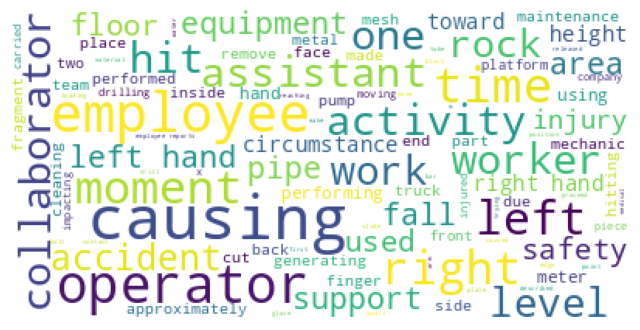

In [ ]:
wordCloud(data,'cleansed_text')

**Observation:**

There were 156943 words in the data before preprocessing and 134128 words after preprocessing

### Removing stop words using Spacy

In [ ]:
en = spacy.load('en_core_web_sm')
spacy_stopwords = en.Defaults.stop_words


In [ ]:
#Created a function to remove stop words from the text

def removeStopWords(data, columnName):
  text = []
  for i in range(data.shape[0]):
    t = data[columnName][i].split()
    words = [word for word in t if not word in spacy_stopwords]
    words = " ".join(words)
    text.append(words)
  return text


In [ ]:
data['spacy_nostopwords_text'] = removeStopWords(data,'cleansed_text')

In [ ]:
data.loc[100:102,['cleansed_text','spacy_nostopwords_text']]

,cleansed_text,spacy_nostopwords_text
100,after discharging sodium hydroxide and disconn...,discharging sodium hydroxide disconnecting emp...
101,jesus operator of the concrete throwing team n...,jesus operator concrete throwing team n deg sh...
102,the employee performed the return of the load ...,employee performed return load entrance depart...


There are 79064 words in the combination of all the texts


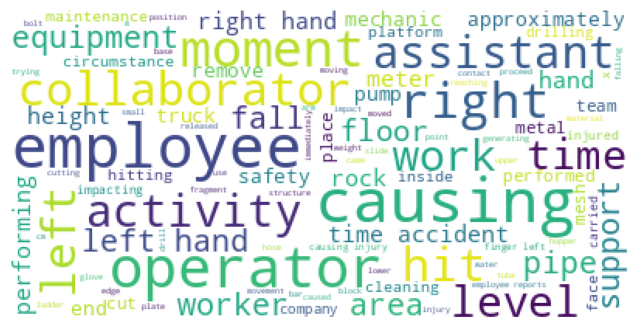

In [ ]:
wordCloud(data, 'spacy_nostopwords_text')

### Lemmatization using spaCy Library

In [ ]:
def spaCyLemmatization(data,coloumName):
  lemma_texts = []

  for i in range(data.shape[0]):
    doc = nlp(data['spacy_nostopwords_text'][i])

    lemma_list =[]
    for token in doc:
      lemma_list.append(token.lemma_)
      lemma_text = ' '.join(lemma_list)

    lemma_texts.append(lemma_text)

  return lemma_texts

In [ ]:
data['spacy_lemmatized_text'] = spaCyLemmatization(data,'spacy_nostopwords_text')

In [ ]:
data.loc[[3,55,57],['cleansed_text','spacy_nostopwords_text','spacy_lemmatized_text']]

,cleansed_text,spacy_nostopwords_text,spacy_lemmatized_text
3,being approximately in the 1880 the personnel ...,approximately 1880 personnel begins task unloc...,approximately 1880 personnel begin task unlock...
55,during the discharge of the operator proceeds ...,discharge operator proceeds remove bag hose ci...,discharge operator proceed remove bag hose cir...
57,when installing the rapper pin of the tractor ...,installing rapper pin tractor rapper support a...,instal rapper pin tractor rapper support arm s...


Lemmatization using spaCy tranformed the words moments to moment, collaborators to collaborator, ends to end, slides to slide

## Step  4: Data preparation - Cleansed data in .xlsx or .csv file

In [ ]:
#Function to write cleansed data into a excel or csv file
#File formats Excel -> xlsx and CSV -> csv
def writeToFile(data, columnList,fileFormat,fileName):
  if fileFormat == 'xlsx':
    data.to_excel(fileName,columns=columnList)

  if fileFormat == 'csv':
    data.to_csv(fileName, columns = columnList,index=False)


In [ ]:
#Write cleansed data into Excel file
writeToFile(data,['AccidentLevel','spacy_lemmatized_text'],'xlsx','/content/drive/MyDrive/Colab Notebooks/ChatBotCleansedData.xlsx')

In [ ]:
#Write
writeToFile(data,['AccidentLevel','spacy_lemmatized_text'],'csv','/content/drive/MyDrive/Colab Notebooks/ChatBotCleansedData.csv')

# Step 5: Design train and test basic machine learning classifiers

## Vectorization, Splitting Train, Test data

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ChatBotCleansedData.csv")['AccidentLevel']
x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ChatBotCleansedData.csv")['spacy_lemmatized_text']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(x)

smote = SMOTE(sampling_strategy='auto', random_state=42)
cleansed_data, accident_levels = smote.fit_resample(X_tfidf, y)
x_train_vectorized, x_test_vectorized, y_train, y_test = train_test_split(cleansed_data, accident_levels, test_size=0.2, random_state=42)

## Model Training

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

classifiers = [
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(3)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Support Vector Classifier", SVC(C= 100, gamma= 'scale', kernel= 'rbf')),
]

best_classifier = None
best_accuracy = 0

for name, classifier in classifiers:
    classifier.fit(x_train_vectorized, y_train)
    y_pred = classifier.predict(x_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division='warn'))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name

print(f"The best classifier is: {best_classifier} with accuracy: {best_accuracy}")


Classifier: AdaBoost
Accuracy: 0.44983818770226536
Classification Report:
               precision    recall  f1-score   support

           I       0.23      0.89      0.36        47
          II       0.60      0.21      0.31        73
         III       0.00      0.00      0.00        56
          IV       0.52      0.26      0.34        66
           V       1.00      0.97      0.98        67

    accuracy                           0.45       309
   macro avg       0.47      0.47      0.40       309
weighted avg       0.50      0.45      0.41       309



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: K-Nearest Neighbors
Accuracy: 0.8478964401294499
Classification Report:
               precision    recall  f1-score   support

           I       1.00      0.02      0.04        47
          II       0.77      1.00      0.87        73
         III       0.78      1.00      0.88        56
          IV       0.93      0.98      0.96        66
           V       0.94      1.00      0.97        67

    accuracy                           0.85       309
   macro avg       0.88      0.80      0.74       309
weighted avg       0.88      0.85      0.78       309

Classifier: Random Forest
Accuracy: 0.9611650485436893
Classification Report:
               precision    recall  f1-score   support

           I       0.81      1.00      0.90        47
          II       0.99      0.95      0.97        73
         III       1.00      0.91      0.95        56
          IV       1.00      0.95      0.98        66
           V       1.00      1.00      1.00        67

    accuracy         